<a href="https://colab.research.google.com/github/lochuynhk/lochuynhk.github.io/blob/master/Loc_Huynh_Buildweek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SYB60_312_Carbon Dioxide Emission Estimates.csv to SYB60_312_Carbon Dioxide Emission Estimates (1).csv


In [0]:
column_headers = ['Country Code', 'Country Name', 'Year', 'Series', 'Value', 'Footnotes', 'Source']

import io
df = pd.read_csv(io.BytesIO(uploaded['SYB60_312_Carbon Dioxide Emission Estimates.csv']), header=None, names=column_headers, skiprows=2, na_filter=False)

In [5]:
df.head()
print(df.shape)


(3308, 7)


In [6]:
df.head(30)

,Country Code,Country Name,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1975,Emissions (thousand metric tons of carbon diox...,"16,853,532",,Carbon Dioxide Information Analysis Center (CD...
1,1,"Total, all countries or areas",1985,Emissions (thousand metric tons of carbon diox...,"19,864,139",,Carbon Dioxide Information Analysis Center (CD...
2,1,"Total, all countries or areas",1995,Emissions (thousand metric tons of carbon diox...,"23,120,435",,Carbon Dioxide Information Analysis Center (CD...
3,1,"Total, all countries or areas",2005,Emissions (thousand metric tons of carbon diox...,"29,490,014",,Carbon Dioxide Information Analysis Center (CD...
4,1,"Total, all countries or areas",2010,Emissions (thousand metric tons of carbon diox...,"33,472,376",,Carbon Dioxide Information Analysis Center (CD...
5,1,"Total, all countries or areas",2012,Emissions (thousand metric tons of carbon diox...,"35,470,891",,Carbon Dioxide Information Analysis Center (CD...
6,1,"Total, all countries or areas",2013,Emissions (thousand metric tons of carbon diox...,"35,837,591",,Carbon Dioxide Information Analysis Center (CD...
7,1,"Total, all countries or areas",2014,Emissions (thousand metric tons of carbon diox...,"36,138,285",,Carbon Dioxide Information Analysis Center (CD...
8,1,"Total, all countries or areas",1975,Emissions per capita (metric tons of carbon di...,4.1,,Carbon Dioxide Information Analysis Center (CD...
9,1,"Total, all countries or areas",1985,Emissions per capita (metric tons of carbon di...,4.1,,Carbon Dioxide Information Analysis Center (CD...


In [7]:
df.dtypes



Country Code     int64
Country Name    object
Year             int64
Series          object
Value           object
Footnotes       object
Source          object
dtype: object

In [0]:
df["Value"] = df["Value"].str.replace(",", "").astype(float)

In [0]:
import matplotlib.pyplot as plt

In [10]:
co2_output_overtime = pd.concat([df.Year, df.Value], axis=1)

co2_output_overtime.head(20)

,Year,Value
0,1975,16853532.0
1,1985,19864139.0
2,1995,23120435.0
3,2005,29490014.0
4,2010,33472376.0
5,2012,35470891.0
6,2013,35837591.0
7,2014,36138285.0
8,1975,4.1
9,1985,4.1


In [0]:
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

In [0]:
import seaborn as sns


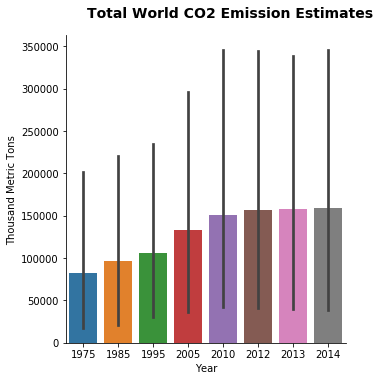

In [13]:

co = sns.catplot(x='Year', y='Value', kind='bar', data=co2_output_overtime)
co.set_axis_labels("","Thousand Metric Tons")
co.set(xlabel='Year')
co.fig.suptitle("Total World CO2 Emission Estimates", fontweight='bold', fontsize=14, x=.65, y=1.05)
plt.show()

In [0]:

df2 = df.drop(columns=['Country Code', 'Series', 'Footnotes', 'Source'])


In [15]:
df2.head(20)

,Country Name,Year,Value
0,"Total, all countries or areas",1975,16853532.0
1,"Total, all countries or areas",1985,19864139.0
2,"Total, all countries or areas",1995,23120435.0
3,"Total, all countries or areas",2005,29490014.0
4,"Total, all countries or areas",2010,33472376.0
5,"Total, all countries or areas",2012,35470891.0
6,"Total, all countries or areas",2013,35837591.0
7,"Total, all countries or areas",2014,36138285.0
8,"Total, all countries or areas",1975,4.1
9,"Total, all countries or areas",1985,4.1


In [16]:
df2.iloc[0:8, 2].sum()

230247263.0

In [17]:
ind_countries = df[df["Country Name"] != "Total, all countries or areas"]
gb = ind_countries.groupby("Country Name")
# gb.first()
highest_20 = gb.sum().sort_values(by='Value', ascending=False)[0:20]
highest_20

,Country Code,Year,Value
Country Name,,,
China,2496,32018,51683990.3
United States of America,13440,32018,40750082.1
India,5696,32018,10724334.2
Russian Federation,7716,24098,10231903.0
Japan,6272,32018,9070602.0
Germany,3312,24098,4637264.1
United Kingdom,13216,32018,4084115.7
Canada,1984,32018,3950887.2
Iran (Islamic Republic of),5824,32018,3495968.0


In [18]:
new_highest_20 = highest_20.drop(columns=['Country Code', 'Year'])
new_highest_20


,Value
Country Name,
China,51683990.3
United States of America,40750082.1
India,10724334.2
Russian Federation,10231903.0
Japan,9070602.0
Germany,4637264.1
United Kingdom,4084115.7
Canada,3950887.2
Iran (Islamic Republic of),3495968.0


In [19]:
ind_countries = df[df["Country Name"] != "Total, all countries or areas"]
gb = ind_countries.groupby("Country Name")
# gb.first()
lowest_200 = gb.sum().sort_values(by='Value', ascending=False)[20:225]
lowest_200

,Country Code,Year,Value
Country Name,,,
Turkey,12672,32018,1880124.6
Ukraine,9648,24098,1879469.1
Thailand,12224,32018,1676552.6
Netherlands,8448,32018,1355089.6
Kazakhstan,4776,24098,1349259.7
...,...,...,...
Liechtenstein,3504,16098,203.3
Wallis and Futuna Islands,8760,20108,137.0
Saint Helena,9156,28068,86.4


In [20]:
lowest_200 = lowest_200.drop(columns=['Country Code', 'Year'])
lowest_200

,Value
Country Name,
Turkey,1880124.6
Ukraine,1879469.1
Thailand,1676552.6
Netherlands,1355089.6
Kazakhstan,1349259.7
...,...
Liechtenstein,203.3
Wallis and Futuna Islands,137.0
Saint Helena,86.4


In [21]:
lowest_200.dtypes

Value    float64
dtype: object

In [0]:
lowest_200 = lowest_200.reset_index()

In [23]:
lowest_200.Value.sum()

38680968.699999996

In [24]:
new_highest_20.Value.mean()

8517527.125

In [25]:
df2.Value.mean()

132792.86901451123

In [26]:
new_highest_20.Value.sum()

170350542.5

In [27]:
df2.Value.sum()

439278810.6999999

In [0]:
new_highest_20 = new_highest_20.reset_index()

In [29]:
new_highest_20.isna().sum()


Country Name    0
Value           0
dtype: int64

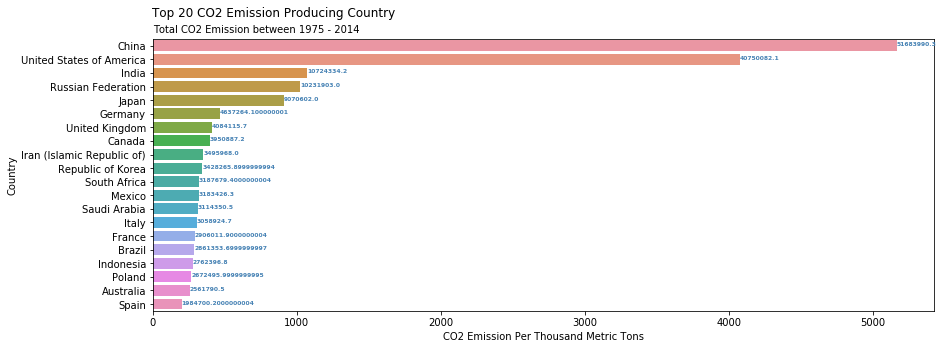

In [84]:
y = new_highest_20.Value


ax = sns.barplot(x='Value', y='Country Name', data=new_highest_20)
plt.gcf().set_size_inches(14,5)
ax.set_title('Top 20 CO2 Emission Producing Country', x=.155, y=1.06)
ax.text(s='Total CO2 Emission between 1975 - 2014', x=0, y=-1)
ax.set(xlabel='CO2 Emission Per Thousand Metric Tons', ylabel='Country')
ax.set_xticklabels(['0', '1000', '2000', '3000', '4000', '5000', '6000'], rotation='horizontal')
#plt.show()
for i, v in enumerate(y):
    ax.text(v, i, str(v), color='steelblue', fontsize=6, fontweight='bold')


In [67]:
sum_of_top20 = new_highest_20.Value.sum()
sum_of_rest_world = lowest_200.Value.sum()
sum_of_world = (sum_of_top20 + sum_of_rest_world)

Co_comparison = {'Top_20_Countries':[sum_of_top20],
                 'Rest_of_world': [sum_of_rest_world],
                 'Total_world_CO2_Emission': [sum_of_world]}

df3 = pd.DataFrame(Co_comparison, columns= ['Top_20_Countries', 'Rest_of_world'])
df4 = pd.DataFrame(Co_comparison, columns= ['Top_20_Countries', 'Rest_of_world', 'Total_world_CO2_Emission'])
df3.head()




,Top_20_Countries,Rest_of_world
0,170350542.5,38680968.7


In [68]:
df4.head()

,Top_20_Countries,Rest_of_world,Total_world_CO2_Emission
0,170350542.5,38680968.7,209031511.2


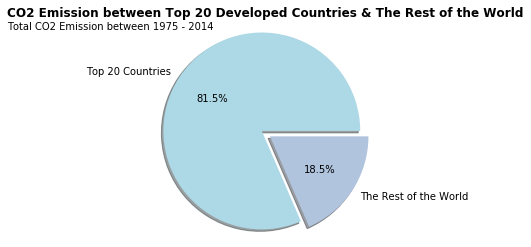

In [69]:
sizes = [81.5, 18.5]
labels = 'Top 20 Countries', 'The Rest of the World'
explode = (0.1, 0)
fig1, df3 = plt.subplots()
colors = ['lightblue', 'lightsteelblue']
df3.set_title('CO2 Emission between Top 20 Developed Countries & The Rest of the World', fontweight='bold')
df3.text(s='Total CO2 Emission between 1975 - 2014', x=-2.67, y=1.09)
df3.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')
df3.axis('equal')
plt.show()